# <span style="color:blue"> Esercitazione 10 - Calcolo Parallelo Applicato all'Algoritmo Genetico  </span>

## <span style="color:blue"> Indice</span>

- [Esercizio 10.1 - Parallelizzazione dell'algoritmo genetico](#Esercizio10.1)

- [Esercizio 10.2 - Applicazione al TSP per capoluoghi italiani](#Esercizio10.2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## <span id="Esercizio10.1" style="color:blue">  Esercizio 10.1 - Parallelizzazione dell'algoritmo genetico </span>[^](#toc)

In questo esercizio è stato parallelizzato l'algoritmo genetico sviluppato nell'_Esercizio 9.1_ per il TSP.
- La parallelizzazione consiste nell'avviare diversi processi indipendenti (_continenti_) che eseguono l'algoritmo genetico (il `main` del programma C++) in parallelo.
- L'esecuzione in parallelo dei processi avviene contemporaneamente, almeno fino a quando il numero di processi non è maggiore del numero dei core logici del computer.
- Caso dell'_Esercizio 10.2_: eseguendo il programma da `Windows Powershell` con `mpiexec -n 11 main.exe`, vengono lanciato $11$ processi indipendenti che eseguono `main.exe` contemporaneamente (è stato utilizzato un PC con $12$ core logici)
- Ogni processo è indicato da un _rank_, che per $11$ processi va da $0$ a $10$.

È stata impiegata la libreria `MPI` (_Message-Passing Interface_) per C++.  

- Ogni continente inizializza e fa evolvere la sua popolazione in modo separato dalle altre.
- Ogni $N_{\mathrm{migr}}$ generazioni, viene eseguita una _migrazione_: due continenti sono selezionati (casualmente) per eseguire un passaggio di individui
    - il _giver_ copia il suo miglior individuo e lo invia al _receiver_, il quale va a sostituire il suo peggior individuo.
    - Il _receiver_ riordina la sua popolazione.

  In questo modo, i continenti non restano isolati ma contribuiscono al raggiungimento della miglior soluzione, riducendo inoltre il tempo di calcolo. 
- Al termine dell’esecuzione, si determina il miglior percorso tra tutti i processi.

## <span id="Esercizio10.2" style="color:blue">  Esercizio 10.2 - Applicazione al TSP per capoluoghi italiani </span>[^](#toc)

In questo esercizio, il programma sviluppato nell'_Esercizio 10.1_ è applicato ai capoluoghi di provincia italiani.
- Si hanno $110$ luoghi (le città), individuati da una coppia di coordinate.
- Sono stati utilizzati $11$ processi.
- Sono stati scelti $1000$ individui per popolazione.
- L'evoluzione dura $2000$ generazioni.
- I valori parametri dell'algoritmo genetico (probabilità e $p_{sel}$) sono stati mantenuti identici a quelli dell'_Esercizio 9.1_.

Il calcolo è stato eseguito
1. senza migrazioni;
2. con una migrazione ogni $20$ generazioni.

### i. Calcolo senza migrazioni

Di seguito è mostrato il risultato del calcolo in assenza di migrazioni. A sinistra è plottato l'andamento del miglior valore (dato da $L^{(1)}$, definita nell'_Esercitazione 9_) per ciascun processo, in funzione del numero di generazioni trascorse. A destra si mostra lo stesso grafico, ingrandito in corrispondenza della regione di convergenza.

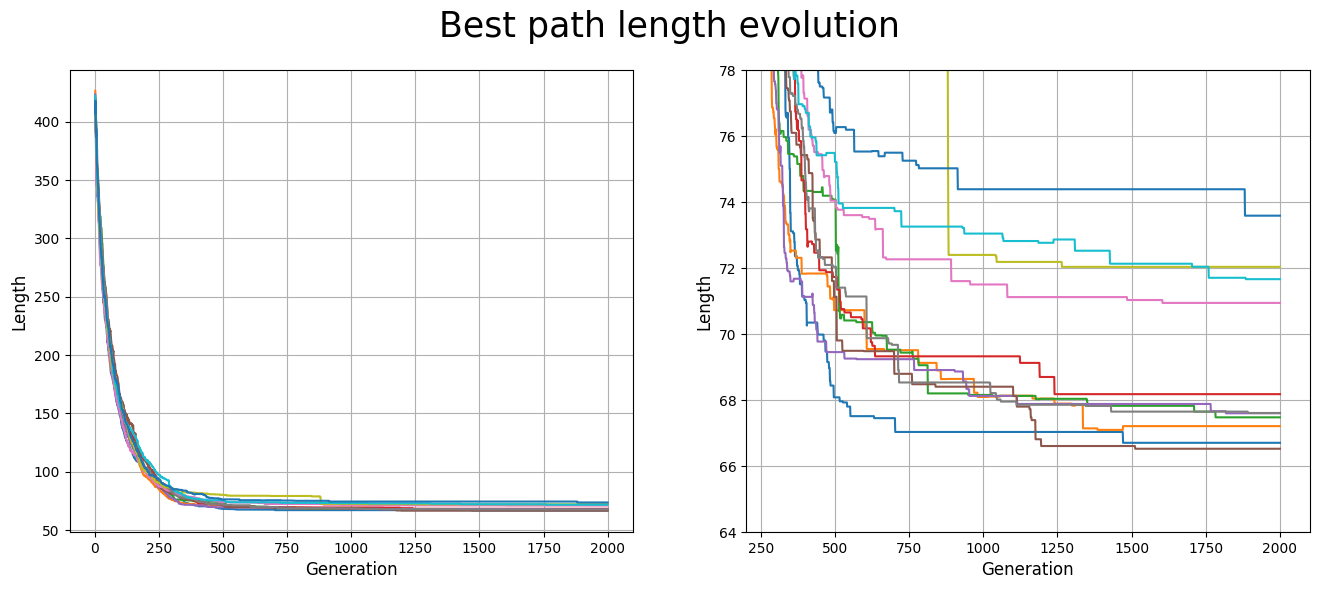

In [2]:
Nproc=11      # Number of processes

# Path length
plt.figure(figsize=(16,6))
plt.suptitle('Best path length evolution',fontsize=25)
Data=[]
BestL=[]
for r in range(Nproc):
    filename=f'../Es10/Output/NoMigration/r_{r}/best_length.dat'
    gen,best=np.loadtxt(filename,skiprows=1,unpack=True)
    Data.append((gen,best))
    BestL.append((best[-1],r))

plt.subplot(1,2,1)
for gen,best in Data:
    plt.plot(gen,best)
plt.xlabel('Generation',fontsize=12)
plt.ylabel('Length',fontsize=12)
plt.grid(True)
plt.subplot(1,2,2)
for gen,best in Data:
    plt.plot(gen,best)
plt.xlabel('Generation',fontsize=12)
plt.ylabel('Length',fontsize=12)
plt.xlim(200,2100)
plt.ylim(64,78)
plt.grid(True)
plt.show()

Si osserva che:
- l'algoritmo converge ad una lunghezza minima per ogni processo
- la convergenza avviene entro circa $600$ generazioni
- la miglior lunghezza è diversa per ogni processo: i processi tendono a rimanere confinati in regioni di minimo locale

Il miglior percorso trovato ha una lunghezza pari a

In [3]:
GlobalBestL_0,BestRank_0=min(BestL,key=lambda x: x[0])
print(f"{GlobalBestL_0:.2f}")

66.51


Ed è stato trovato nel processo

In [4]:
print(BestRank_0)

5


### i. Calcolo senza migrazioni

Di seguito è mostrato il risultato del calcolo con una migrazione ogni $N_{\mathrm{migr}}=20$ generazioni ($100$ migrazioni totali).

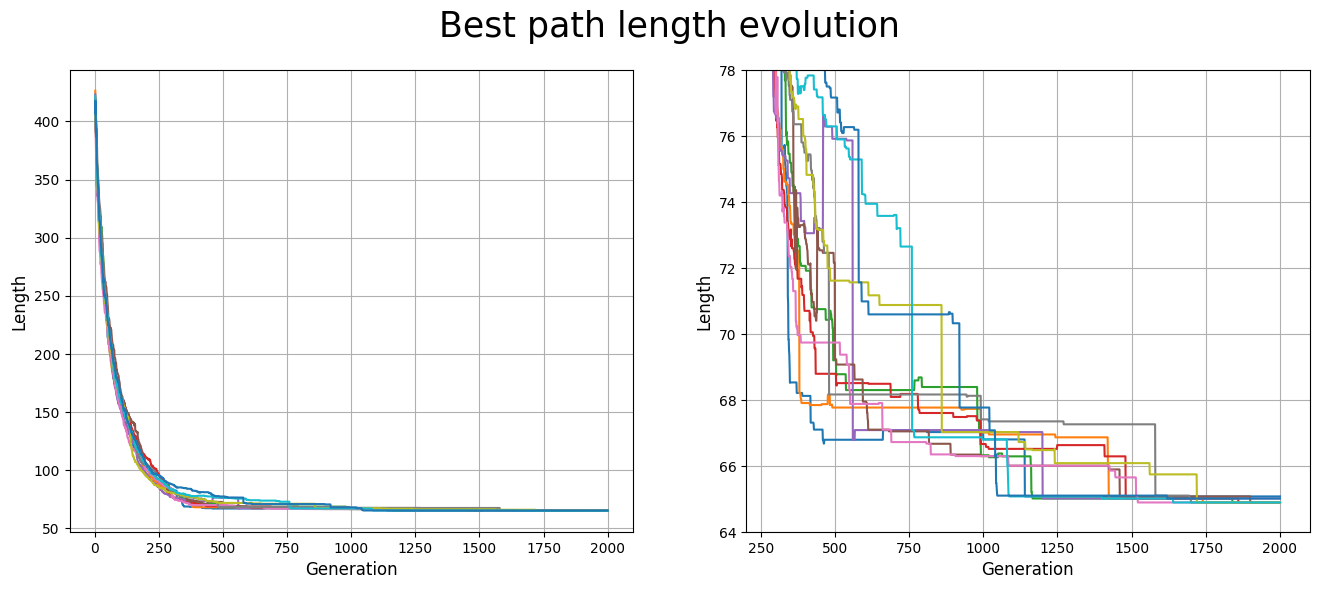

In [5]:
# Path length
plt.figure(figsize=(16,6))
plt.suptitle('Best path length evolution',fontsize=25)
Data=[]
BestL=[]
for r in range(Nproc):
    filename=f'../Es10/Output/Migration/r_{r}/best_length.dat'
    gen,best=np.loadtxt(filename,skiprows=1,unpack=True)
    Data.append((gen,best))
    BestL.append((best[-1],r))

plt.subplot(1,2,1)
for gen,best in Data:
    plt.plot(gen,best)
plt.xlabel('Generation',fontsize=12)
plt.ylabel('Length',fontsize=12)
plt.grid(True)
plt.subplot(1,2,2)
for gen,best in Data:
    plt.plot(gen,best)
plt.xlabel('Generation',fontsize=12)
plt.ylabel('Length',fontsize=12)
plt.xlim(200,2100)
plt.ylim(64,78)
plt.grid(True)
plt.show()

Si osserva che:
- anche in questo caso l'algoritmo converge ad una lunghezza minima per ogni processo
- la convergenza avviene dopo (tra le $1200$ e le $1750$ generazioni), ma avviene per tutti i processi ad un valore più basso
- i valori migliori di ogni processo sono molto più simili tra di loro rispetto al caso in cui non sono avvenute migrazioni

È dunque chiaro come lo scambio di dati, e quindi un'evoluzione dei processi non indipendente dagli altri, favorisca
- il raggiungimento di una soluzione migliore
- il maggior accordo tra i diversi processi

Per quanto lo scopo del programma fosse trovare il percorso più breve, è importante evidenziare come il principale vantaggio dell'utilizzo delle migrazioni sia il raggiungimento di un miglior accordo tra i processi, ovvero in una maggiore robustezza del risultato. Infatti
- non è per forza vero che il risultato di un calcolo eseguito senza migrazioni (o addirittura non in parallelo) sia peggiore, vista la stocasticità su cui si basano gli algoritmi di ricerca/ottimizzazioni implementati (anche se tipicamente è così)
- ma dei risultati distribuiti entro un intervallo di valori minore tra i vari processi sono più affidabili, non dovuti all'esplorazione di un percorso particolarmente "buono" e raro.

Il miglior percorso trovato ha una lunghezza pari a

In [6]:
GlobalBestL_100,BestRank_100=min(BestL,key=lambda x: x[0])
print(f"{GlobalBestL_100:.2f}")

64.89


ed è stato trovato nel processo

In [7]:
print(BestRank_100)

1
